In [1]:
# 배열의 크기, 반복 횟수 설정
sizes = [
    100, 250, 500, 750, 
    1000, 2500, 5000, 7500, 
    10000, 25000, 50000, 75000, 
    100000, 250000, 500000, 750000,
    1000000
]  # 배열의 크기

SIZE = sizes[10] # 50,000
THRESHODE_RANGE = 250
iterations = 5 # 각 크기별 평균을 내기 위해 반복할 횟수

thresholds = list(range(THRESHODE_RANGE)) # threshold의 범위를 0 ~ 249까지 지정
''' 
    c로 만든 두 가지 정렬(normal Quicksort, threshold used Quicksort)의 시간을 구해 파일에 추가하는 어플리케이션을
    위 두 가지 sizes, iterations을 사용하여, 반복해서 값을 구한다.
'''
for threshold in thresholds:
    for _ in range(iterations):
        !../main.out {SIZE} {threshold}

Qiucksort: elapsed time: 6 milliseconds
threshold used Qiucksort: elapsed time: 5 milliseconds
Qiucksort: elapsed time: 5 milliseconds
threshold used Qiucksort: elapsed time: 5 milliseconds
Qiucksort: elapsed time: 5 milliseconds
threshold used Qiucksort: elapsed time: 5 milliseconds
Qiucksort: elapsed time: 5 milliseconds
threshold used Qiucksort: elapsed time: 4 milliseconds
Qiucksort: elapsed time: 4 milliseconds
threshold used Qiucksort: elapsed time: 15 milliseconds
Qiucksort: elapsed time: 5 milliseconds
threshold used Qiucksort: elapsed time: 4 milliseconds
Qiucksort: elapsed time: 5 milliseconds
threshold used Qiucksort: elapsed time: 5 milliseconds
Qiucksort: elapsed time: 5 milliseconds
threshold used Qiucksort: elapsed time: 4 milliseconds
Qiucksort: elapsed time: 5 milliseconds
threshold used Qiucksort: elapsed time: 4 milliseconds
Qiucksort: elapsed time: 5 milliseconds
threshold used Qiucksort: elapsed time: 5 milliseconds
Qiucksort: elapsed time: 4 milliseconds
threshold

In [2]:
'''
    위에서 구한 정렬 시간을 저장한 파일을 가져와서 딕셔너리에 담는다.
'''
# 시간의 합을 저장할 딕셔너리 컨테이너
threshold_used_sort_times = {}

# c 어플리케이션 main.out으로 생성, 추가된 파일 'Quicksort_threshold.txt'를 가져와 한 줄 씩 읽는다.
with open('Quicksort_threshold.txt', 'r') as f:
    # '/n'문자을 기준으로 한 줄씩 가져와 읽는다.
    for line in f:
        size, threshold, quick_sort_time, threshold_used_sort_time = map(int, line.strip().split()) 
                                                                    # .strip(): 양쪽 '\n'문자 제거 
                                                                    # .split(): ' '를 기준으로, 토큰화
        # 딕셔너리 컨테이너에 있는지 현재 크기의 시간 데이터가 있는지 확인
        # 없으면 추가                                            
        if threshold_used_sort_times.get(threshold) == None:
            threshold_used_sort_times[threshold] = threshold_used_sort_time
        # 있으면 합쳐준다.
        else:
            threshold_used_sort_times[threshold] += threshold_used_sort_time
            
# 결과 각 sizes(N)의 배열을 정렬할 때 걸리는 시간의 합을 저장하는 딕셔너리를 얻을 수 있다.
print(f"threshold_used_sort_times: {threshold_used_sort_times}")

threshold_used_sort_times: {0: 34, 1: 22, 2: 24, 3: 25, 4: 24, 5: 25, 6: 25, 7: 28, 8: 25, 9: 28, 10: 27, 11: 25, 12: 25, 13: 22, 14: 25, 15: 22, 16: 24, 17: 23, 18: 25, 19: 26, 20: 22, 21: 22, 22: 27, 23: 21, 24: 22, 25: 27, 26: 23, 27: 22, 28: 21, 29: 26, 30: 21, 31: 22, 32: 24, 33: 24, 34: 29, 35: 23, 36: 24, 37: 29, 38: 29, 39: 23, 40: 21, 41: 22, 42: 24, 43: 30, 44: 31, 45: 26, 46: 22, 47: 21, 48: 29, 49: 22, 50: 28, 51: 26, 52: 27, 53: 23, 54: 24, 55: 25, 56: 22, 57: 26, 58: 25, 59: 27, 60: 27, 61: 23, 62: 23, 63: 24, 64: 26, 65: 24, 66: 26, 67: 23, 68: 21, 69: 23, 70: 28, 71: 25, 72: 27, 73: 27, 74: 30, 75: 24, 76: 20, 77: 24, 78: 25, 79: 28, 80: 42, 81: 29, 82: 23, 83: 23, 84: 24, 85: 41, 86: 29, 87: 24, 88: 25, 89: 25, 90: 27, 91: 36, 92: 26, 93: 38, 94: 24, 95: 25, 96: 26, 97: 25, 98: 32, 99: 27, 100: 27, 101: 26, 102: 26, 103: 24, 104: 27, 105: 29, 106: 27, 107: 28, 108: 27, 109: 26, 110: 28, 111: 28, 112: 26, 113: 25, 114: 25, 115: 26, 116: 25, 117: 28, 118: 27, 119: 26, 12

In [3]:
# 딕셔너리에 저장된 정렬 시간의 평균을 구하는 함수
def average(times: dict, iterations: int) -> list:
    time_average_list: list = []
    for size, sum_time in times.items():
        average: float = sum_time / iterations
        time_average_list.append(average)
    return time_average_list

In [4]:
# quick_sort_average = average(quick_sort_times, iterations)
threshold_used_sort_average = average(threshold_used_sort_times, iterations)

# print(f"quick_sort_average: {quick_sort_average}")
print(f"threshold_used_sort_average: {threshold_used_sort_average}")

threshold_used_sort_average: [6.8, 4.4, 4.8, 5.0, 4.8, 5.0, 5.0, 5.6, 5.0, 5.6, 5.4, 5.0, 5.0, 4.4, 5.0, 4.4, 4.8, 4.6, 5.0, 5.2, 4.4, 4.4, 5.4, 4.2, 4.4, 5.4, 4.6, 4.4, 4.2, 5.2, 4.2, 4.4, 4.8, 4.8, 5.8, 4.6, 4.8, 5.8, 5.8, 4.6, 4.2, 4.4, 4.8, 6.0, 6.2, 5.2, 4.4, 4.2, 5.8, 4.4, 5.6, 5.2, 5.4, 4.6, 4.8, 5.0, 4.4, 5.2, 5.0, 5.4, 5.4, 4.6, 4.6, 4.8, 5.2, 4.8, 5.2, 4.6, 4.2, 4.6, 5.6, 5.0, 5.4, 5.4, 6.0, 4.8, 4.0, 4.8, 5.0, 5.6, 8.4, 5.8, 4.6, 4.6, 4.8, 8.2, 5.8, 4.8, 5.0, 5.0, 5.4, 7.2, 5.2, 7.6, 4.8, 5.0, 5.2, 5.0, 6.4, 5.4, 5.4, 5.2, 5.2, 4.8, 5.4, 5.8, 5.4, 5.6, 5.4, 5.2, 5.6, 5.6, 5.2, 5.0, 5.0, 5.2, 5.0, 5.6, 5.4, 5.2, 5.0, 5.2, 5.2, 5.2, 6.6, 5.4, 5.6, 5.6, 5.6, 5.0, 6.0, 6.0, 5.2, 5.8, 5.6, 5.4, 5.6, 5.4, 5.4, 7.0, 5.6, 5.6, 5.8, 5.0, 5.2, 7.2, 6.2, 5.8, 6.2, 5.8, 5.8, 6.2, 5.4, 5.2, 7.0, 7.8, 6.2, 6.2, 5.6, 5.6, 5.4, 6.4, 5.4, 5.8, 6.0, 6.0, 6.2, 6.0, 6.0, 6.0, 8.0, 8.8, 7.8, 6.0, 5.6, 5.4, 7.2, 5.8, 6.2, 5.8, 5.8, 7.0, 6.4, 6.4, 6.4, 6.0, 7.0, 6.4, 6.0, 6.2, 7.0, 7.6, 7.8, 6.2, 

/var/folders/bc/f500d0zj7m1cdn01yb_3k7bm0000gn/T/ipykernel_50473/2336285432.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


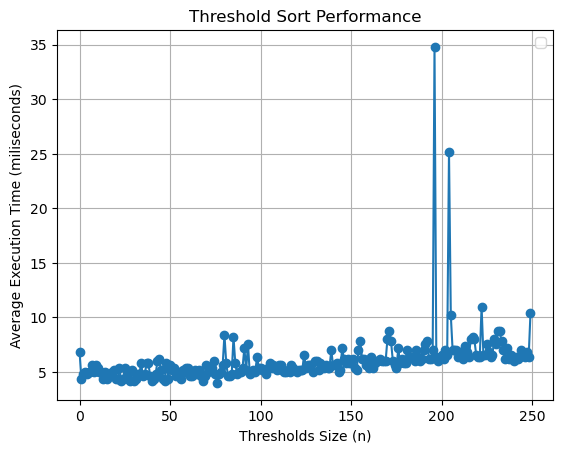

In [5]:
import matplotlib.pyplot as plt
# 데이터를 그래프로 그려주는 라이브러리 설치 필요
# 결과 그래프 그리기
'''
    그래프 정보
    배열의 크기: 50,000, 임계값: 0-249 반복횟수: 5       
'''
# x, y 각 데이터는 list 혹은 Numpy array 형태여야 한다.
thresholds = list(range(len(threshold_used_sort_average)))
plt.plot(thresholds, threshold_used_sort_average, marker='o')
plt.xlabel('Thresholds Size (n)')
plt.ylabel('Average Execution Time (miliseconds)')
plt.title('Threshold Sort Performance')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# 그래프의 범위를 좁혀 유의미한 임계값의 범위를 찾아간다.
thresholds = thresholds[:100] 
threshold_used_sort_average = threshold_used_sort_average[:100]

/var/folders/bc/f500d0zj7m1cdn01yb_3k7bm0000gn/T/ipykernel_50473/3862267184.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


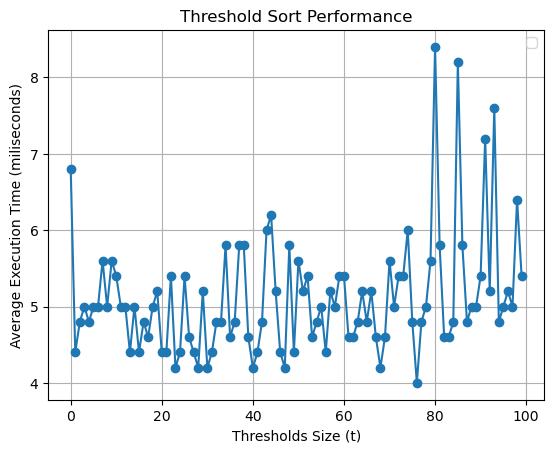

In [7]:
import matplotlib.pyplot as plt
# 데이터를 그래프로 그려주는 라이브러리 설치 필요
# 결과 그래프 그리기
'''
    그래프 정보
    배열의 크기: 50,000, 임계값: 0-(100 - 1) 반복횟수: 5        
'''
# x, y 각 데이터는 list 혹은 Numpy array 형태여야 한다.
thresholds = list(range(len(threshold_used_sort_average)))
plt.plot(thresholds, threshold_used_sort_average, marker='o')
plt.xlabel('Thresholds Size (t)')
plt.ylabel('Average Execution Time (miliseconds)')
plt.title('Threshold Sort Performance')
plt.legend()
plt.grid(True)
plt.show()